In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('covid.csv')

data

,no,pc,wbc,mc,ast,bc,ldh,diagnosis
0,1,Low,Low,Low,High,Normal,Normal,True
1,2,Low,Low,Normal,High,Normal,High,True
2,3,Low,High,Normal,High,Normal,Normal,False
3,4,Low,High,Normal,High,High,Normal,True
4,5,Low,Normal,High,High,Normal,Normal,False
5,6,Low,Normal,Normal,High,Normal,High,True
6,7,Normal,Low,Low,High,Normal,Normal,True
7,8,Normal,High,Normal,High,Normal,Normal,False
8,9,Normal,High,Normal,High,High,High,True
9,10,Normal,Normal,High,High,Normal,Normal,False


In [2]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
pc_encoded=le.fit_transform(data['pc'].values)
wbc_encoded=le.fit_transform(data['wbc'].values)
mc_encoded=le.fit_transform(data['mc'].values)
ast_encoded=le.fit_transform(data['ast'].values)
bc_encoded=le.fit_transform(data['bc'].values)
ldh_encoded=le.fit_transform(data['ldh'].values)
Y=le.fit_transform(data['diagnosis'].values)

X=np.array(list(zip(pc_encoded,wbc_encoded,mc_encoded,ast_encoded,bc_encoded,ldh_encoded)))
X
Y

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0])

In [3]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
model = MultinomialNB()

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.8)

model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

print("Accuracy:",accuracy_score(Y_test, y_pred))

print("\nReport")
print(classification_report(Y_test,y_pred))


Accuracy: 0.7

Report
              precision    recall  f1-score   support

           0       0.55      0.86      0.67         7
           1       0.89      0.62      0.73        13

    accuracy                           0.70        20
   macro avg       0.72      0.74      0.70        20
weighted avg       0.77      0.70      0.71        20



In [11]:
lr_probs=model.predict_proba(X_test)
lr_probs
from sklearn import metrics

In [12]:
lr_probs=lr_probs[:,1]
lr_fpr,lr_tpr,_=metrics.roc_curve(Y_test,lr_probs)

In [13]:
lr_fpr

array([0., 0., 0., 1., 1.])

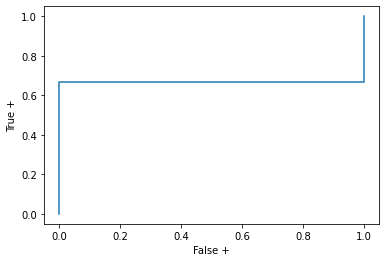

In [17]:
from matplotlib import pyplot
pyplot.plot(lr_fpr,lr_tpr)
pyplot.xlabel("False +")
pyplot.ylabel("True +")
pyplot.show()